## StackOverFlow Tag Network Visualization and Analysis : 

#### Making the network
#### Network Visualization
#### Visualizing SubGraph of Programming Languages
#### Degree Distribution 
#### Centrality Measures (degree and betweenness centrality)

# Build Network

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nodes = pd.read_csv('stack_network_nodes.csv')
edges = pd.read_csv('stack_network_links.csv')

In [3]:
nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [4]:
edges.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


A graph consists of nodes and edges.  In this case the nodes are the tags that appear in a developer's profile in stackoverflow ["Developer Stories"](https://stackoverflow.com/users/story/join). If two tags appear on the same profile there's a tag between them.  To build a graph in networkx first we define an empty graph. Then we add the nodes and the edges to the graph from the dataframes ```nodes``` and ```edges``` by iterating over the rows. 

**Node metadata : **
*  ```nodesize```  :  Proportional to how many developers have that tag in their developer story profile.
*  ```group``` : which group that node belongs to (calculated via a cluster walktrap).

**Edge metadata : **
*  ```value``` :  proportional to how correlated those two tags are (correlation coefficient * 100). 



In [5]:
G = nx.Graph()

In [6]:
for index, row in nodes.iterrows():
    G.add_node(row["name"],group = row["group"], nodesize = row["nodesize"] )

In [7]:
for index, row in edges.iterrows():
    G.add_edge(row["source"], row["target"], weight = row["value"])

In [8]:
nx.info(G)

C:\Users\Ömer Faruk Ballı\AppData\Local\Temp\ipykernel_15988\1064119803.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 115 nodes and 245 edges'

# Connectivity 

A network is connected if there is a path between every pair of vertices. But this tag network is not connected, which means there are some isolated nodes or isolated subgraphs. A connected component is the maximal connected subgraph of a graph. In the tag network we have 6 unique connected components. We can also extract the largest connected component of a graph.

In [9]:
nx.is_connected(G)

False

In [10]:
nx.number_connected_components(G)

6

# Network Visualization

Note : I've used the code in this kernel : https://www.kaggle.com/jncharon/python-network-graph for the network visualization by encapsulating it in a function with minimal changes for convenience. I've changed the syntax for the list comprehensions for assigning node color and also changed the parameters for the spring layout a little bit. We can see the different connected components in the graph, often consisting of 2-3 edges. E.g (excel, excel-vba) and (testing, selenium) which probably refers to the business analysists and Quality assurance developers.

In [13]:
print(nx.__version__)

2.8.4


In [34]:
def draw_graph(G,size):
    nodes = G.nodes()
    color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}
    node_color= [color_map[d['group']] for n,d in G.nodes(data=True)]
    node_size = [d['nodesize']*10 for n,d in G.nodes(data=True)]
    pos = nx.drawing.spring_layout(G,k=0.70,iterations=60)
    plt.figure(figsize=size)
    nx.draw_networkx(G,pos=pos,node_color=node_color)
    plt.show()

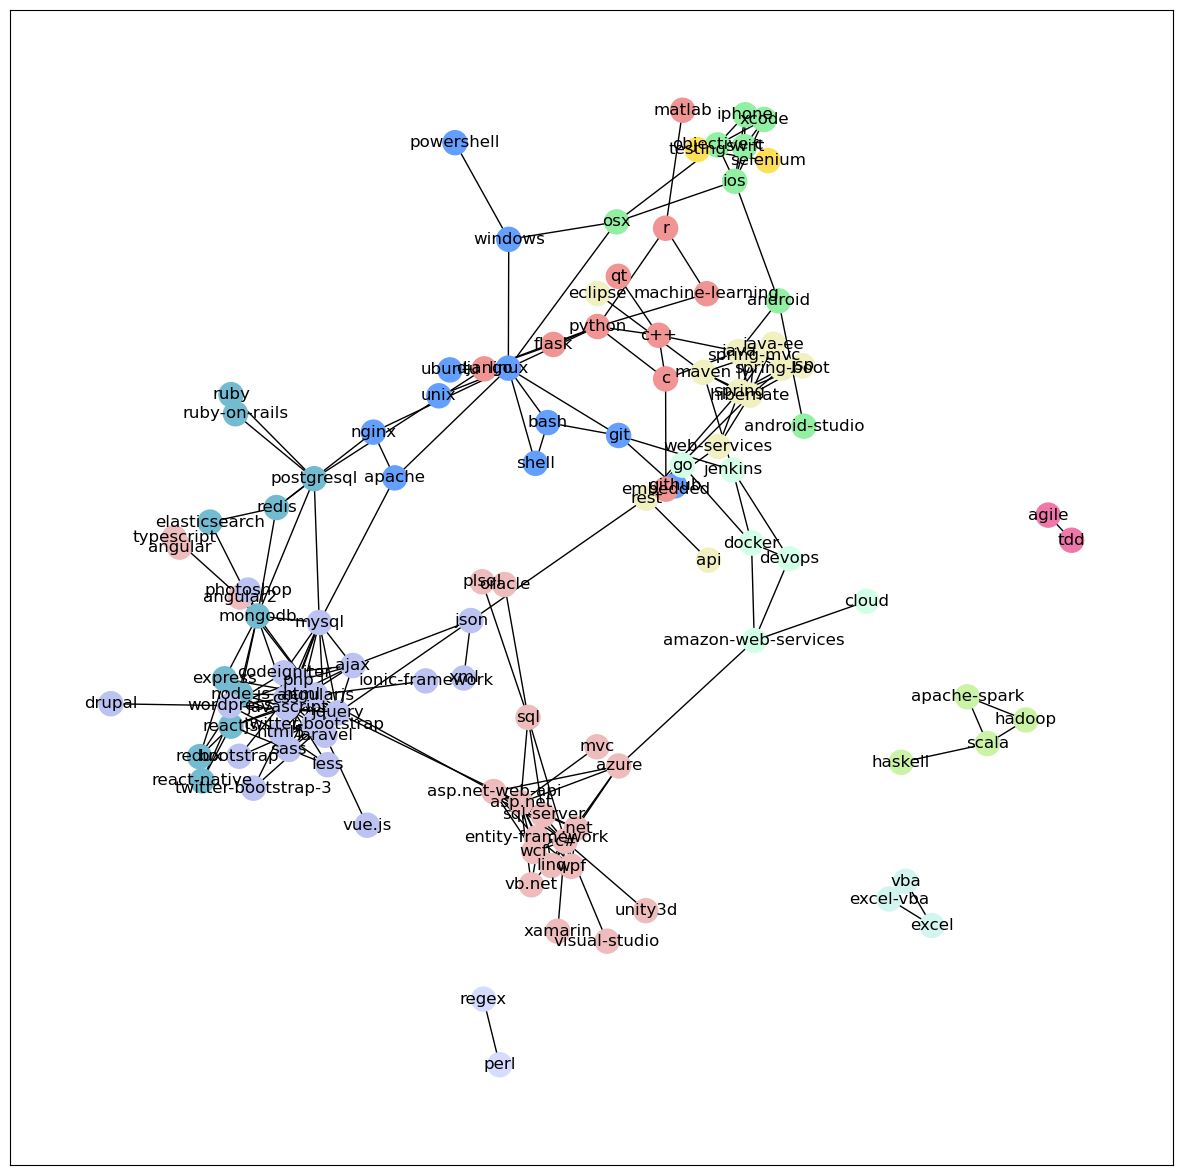

In [35]:
draw_graph(G,size=(15,15))

# Cliques 

In general we consider cliques as groups of people who are closely connected to each other but not connected to people outside the group. In network theory a clique is defined as a maximal complete subgraph of a graph where each node is connected to all the other nodes. The word 'maximal' means that if we add another node to the clique the clique will cease to be a clique. ```nx.find_cliques``` finds all the cliques in a network. We can also extract all the cliques from the tag network. 

In [36]:
cliques = list(nx.find_cliques(G))

In [37]:
clique_number = len(list(cliques))
print(clique_number)

89


In [38]:
for clique in cliques:
    print(clique)

['express', 'reactjs', 'node.js', 'redux']
['express', 'reactjs', 'node.js', 'mongodb', 'angularjs']
['agile', 'tdd']
['bash', 'linux', 'git']
['bash', 'linux', 'shell']
['r', 'python', 'machine-learning']
['r', 'matlab']
['plsql', 'oracle', 'sql']
['reactjs', 'node.js', 'javascript', 'angularjs']
['reactjs', 'node.js', 'react-native', 'redux']
['reactjs', 'sass', 'javascript', 'angularjs']
['mvc', 'asp.net']
['.net', 'asp.net', 'c#', 'linq', 'wcf', 'entity-framework', 'wpf']
['.net', 'asp.net', 'c#', 'linq', 'wcf', 'entity-framework', 'sql-server']
['.net', 'asp.net', 'c#', 'azure']
['angular', 'typescript']
['hibernate', 'spring', 'web-services', 'rest']
['hibernate', 'spring', 'spring-mvc', 'java', 'jsp']
['hibernate', 'spring', 'spring-mvc', 'java', 'java-ee']
['hibernate', 'spring', 'spring-mvc', 'maven']
['hibernate', 'spring', 'spring-mvc', 'spring-boot']
['elasticsearch', 'redis', 'mongodb']
['ubuntu', 'linux']
['angular2', 'typescript']
['angular2', 'angularjs']
['qt', 'c++']


In [39]:
nx.algorithms.clique.cliques_containing_node(G,"python")

[['r', 'python', 'machine-learning'],
 ['python', 'flask', 'django'],
 ['python', 'c', 'c++'],
 ['python', 'linux']]

In [40]:
nx.algorithms.clique.cliques_containing_node(G,"r")

[['r', 'python', 'machine-learning'], ['r', 'matlab']]

In [41]:
nx.algorithms.clique.cliques_containing_node(G,"sql")

[['plsql', 'oracle', 'sql'], ['c#', 'asp.net', 'sql', 'sql-server']]

# Visualize Maximal Clique

It's possible that visualizing the largest cliques will let us see some pattern in the data. After finding all the cliques here we sort them by the length(number of nodes in that clique) and draw the cliques with the maximum length. ```G.subgraph``` allows us to extract a subgraph from the graph by passing a list of nodes. We have 3 cliques of size 7 which are the biggest, however I've only taken the unique nodes in a set while extracting the subgraphs, so we can see two different clusters containing javascript and .net related tags.

In [42]:
sorted_cliques = sorted(list(nx.find_cliques(G)),key=len)

In [43]:
max_clique_nodes = set()

for nodelist in sorted_cliques[-4:-1]:
    for node in nodelist:
        max_clique_nodes.add(node)

In [44]:
max_clique = G.subgraph(max_clique_nodes)

In [45]:
print(nx.info(max_clique))

Graph with 14 nodes and 43 edges


C:\Users\Ömer Faruk Ballı\AppData\Local\Temp\ipykernel_15988\1111792239.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(max_clique))


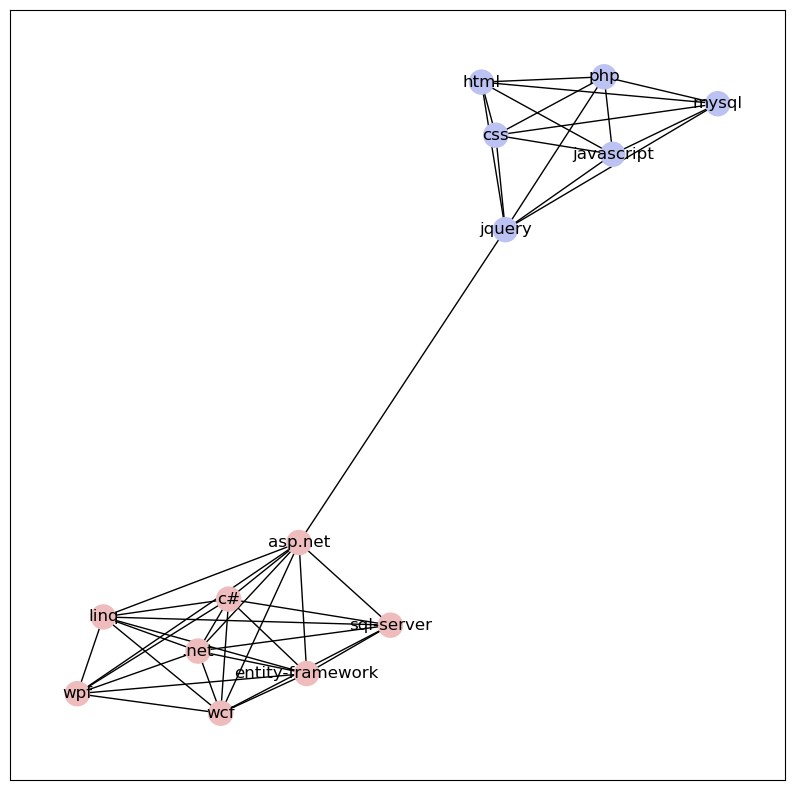

In [46]:
draw_graph(max_clique,size=(10,10))

# Visualizing Programming Language Network

In [47]:
major_languages = ['c','c++','c#','java','python','ruby','scala','haskell','javascript','sql']

In [48]:
p_language_nodes = []
for language in major_languages:
    neighbors = G.neighbors(language)
    p_language_nodes.extend(neighbors)

In [49]:
programming_language_graph = G.subgraph(set(p_language_nodes))

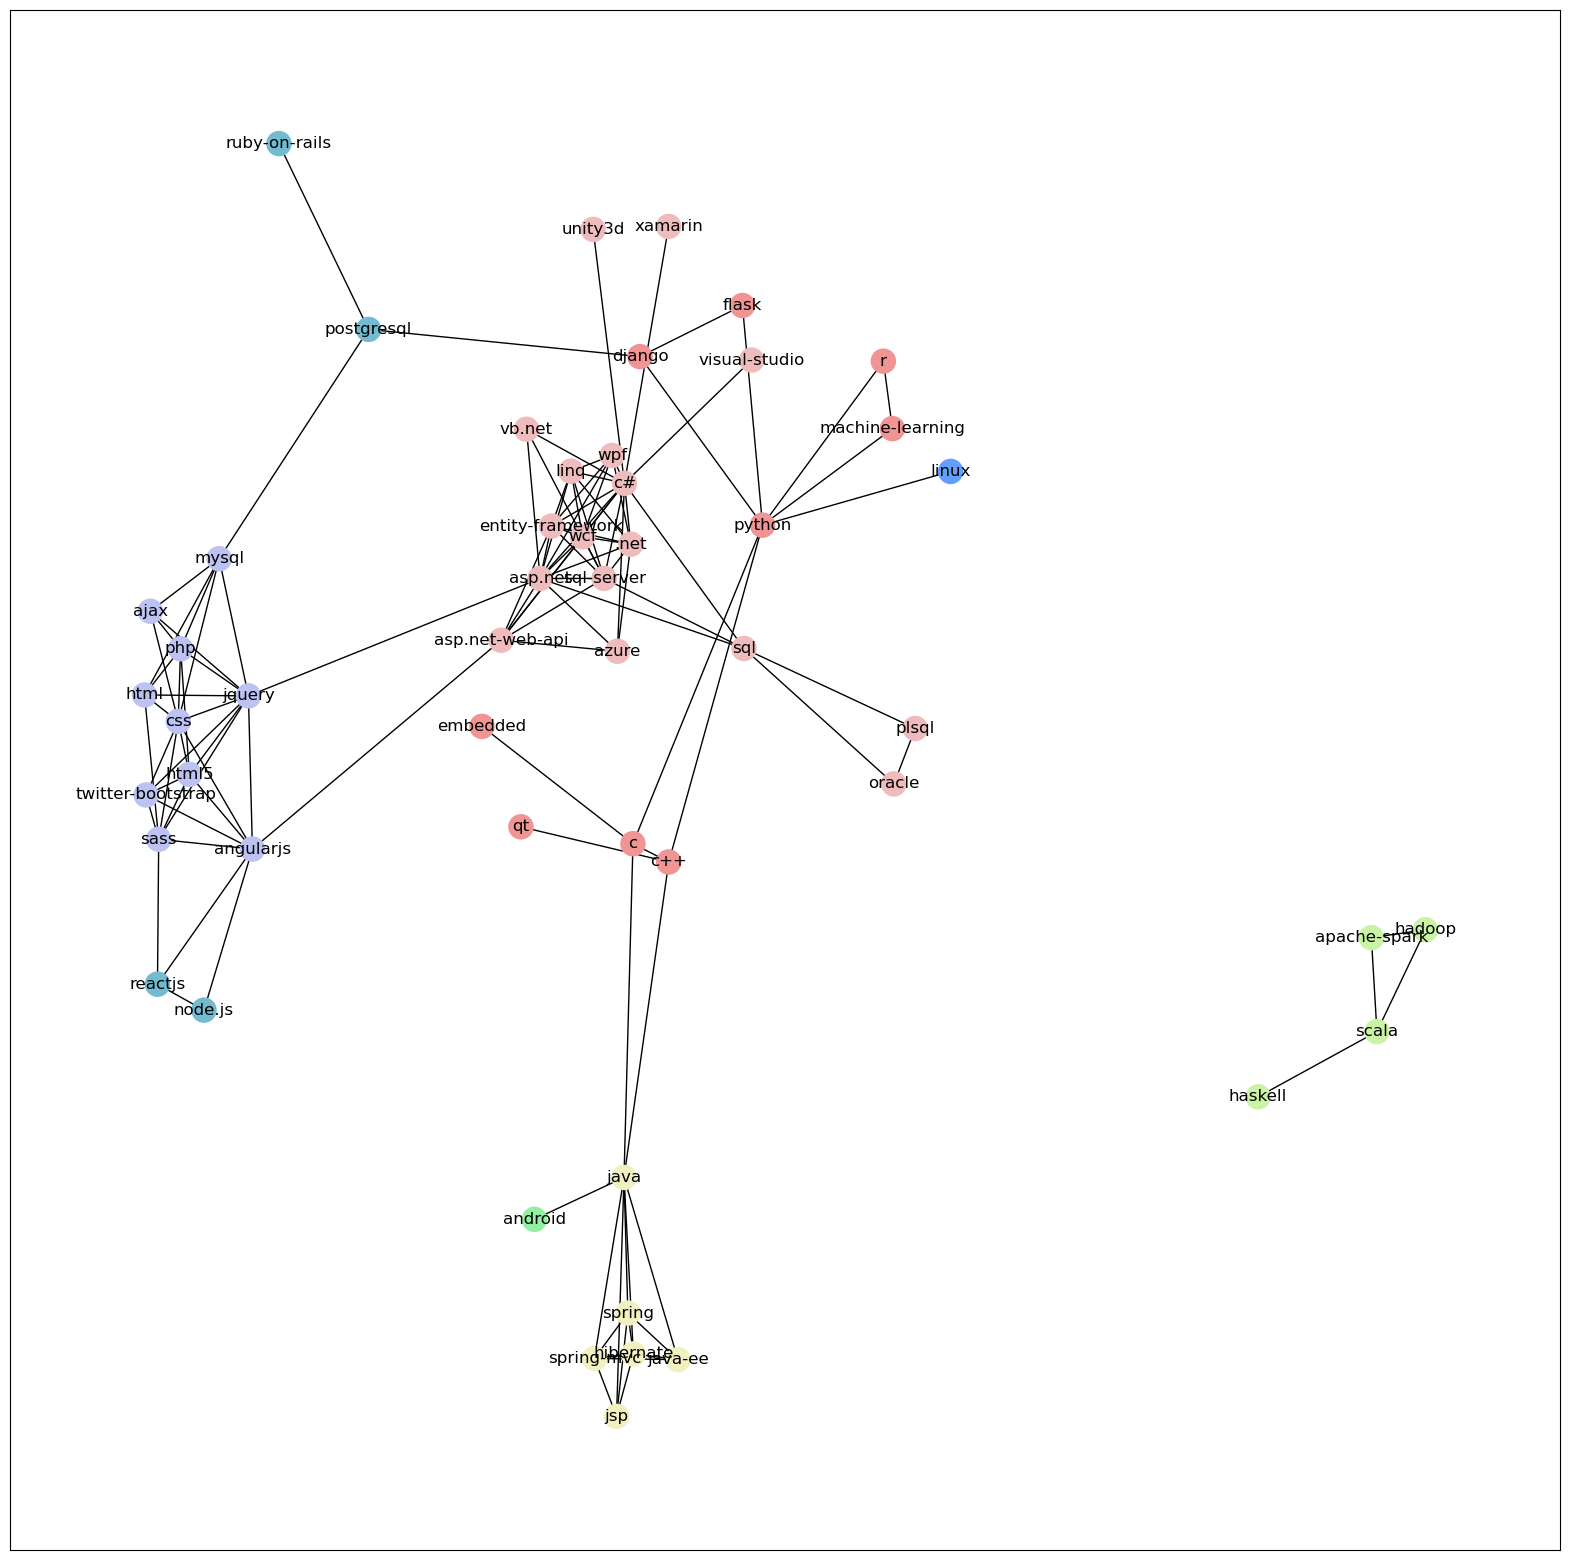

In [50]:
draw_graph(programming_language_graph,size=(20,20))


# Degree Distribution 

For checking the degree distribution of the graph plotting the list containing degrees for each node works. In the tag network clearly most tags hae only 1 or 2 neighbors while some tags are linked to more than 10-12 tags.

Text(0.5, 1.0, 'Stack Overflow Tag Degree Distribution')

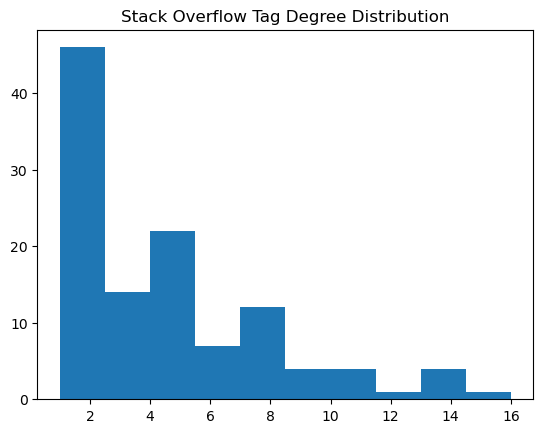

In [51]:
plt.hist([node[1] for node in list(G.degree())])
plt.title("Stack Overflow Tag Degree Distribution")

# Centrality Measures

Centrality measures helps us to idenfity the most important nodes or vertices in a graph. Different centrality measures like degree centrality, betweenness centrality, eigenvector centrality are used to measure influence of nodes in a network.


* **Degree Centrality : ** Degree centrality of a node is the fraction of the nodes it's connected to. Intuitively, the greater the degree that node can be more powerful. For example we can think that a twitter celebrity with 1 m follower is more influential than a regular user with 100 followers.

* **Betweenness Centrality :** Betweenness centrality is a measure of centrality in a graph based on the idea of shortest path. Betwenness centrality of node A is fraction of shortest paths that passes through node A. Nodes with high betweeness centrality works as the 'power broker' or the 'bridges' between different isolated parts of a network.

Here we idenfity the top 10 nodes according to both of the centraliy measures, but they overlap a lot , presumably because it's just a co-occurance network of tags and undirected. In a human social network often the people with higher betweenenss centrality are more interesting.

In [52]:
degree_centrality = nx.degree_centrality(G)

In [53]:
top_10_nodes = sorted(degree_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]

top_10_nodes 

[('jquery', 0.14035087719298245),
 ('css', 0.12280701754385964),
 ('c#', 0.12280701754385964),
 ('asp.net', 0.11403508771929824),
 ('angularjs', 0.11403508771929824),
 ('javascript', 0.10526315789473684),
 ('mysql', 0.09649122807017543),
 ('html5', 0.08771929824561403),
 ('php', 0.08771929824561403),
 ('linux', 0.08771929824561403)]

In [55]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{'html': 0.0011514775138436054,
 'css': 0.04133537048548417,
 'hibernate': 0.053043904033657156,
 'spring': 0.053043904033657156,
 'ruby': 0.0,
 'ruby-on-rails': 0.0,
 'ios': 0.038487173093600655,
 'swift': 0.0,
 'html5': 0.0066522337529762365,
 'c': 0.029389145071492536,
 'c++': 0.02938914507149253,
 'asp.net': 0.17406690608353667,
 'c#': 0.055756579881898374,
 'objective-c': 0.01793199813693526,
 'javascript': 0.023657465051749822,
 'jquery': 0.2555399753457234,
 'redux': 5.175179837499353e-05,
 'reactjs': 0.015409856132889657,
 'php': 0.011546520113878123,
 'mysql': 0.1976931477327379,
 'spring-mvc': 0.00745968051510669,
 '.net': 0.002291495700904179,
 'react-native': 0.0,
 'spring-boot': 0.0,
 'less': 0.0,
 'sass': 0.006284712428031419,
 'hadoop': 0.0,
 'apache-spark': 0.0,
 'sql-server': 0.0035624458060689187,
 'express': 0.0035544972200771017,
 'node.js': 0.012514232492177091,
 'mongodb': 0.06737252741910403,
 'iphone': 0.0,
 'github': 0.0,
 'git': 0.05177577481257034,
 'excel': 

In [56]:
top_10_nodes_by_betweenness_centrality = sorted(betweenness_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]

In [57]:
top_10_nodes_by_betweenness_centrality

[('jquery', 0.2555399753457234),
 ('linux', 0.20840160874161803),
 ('mysql', 0.1976931477327379),
 ('asp.net', 0.17406690608353667),
 ('apache', 0.13087186063431988),
 ('json', 0.12319763505138448),
 ('angularjs', 0.12286762799187795),
 ('rest', 0.11370118004957315),
 ('python', 0.11018306022497917),
 ('postgresql', 0.08761830339613291)]